<a href="https://colab.research.google.com/github/DLesmes/ML_NN_Sk/blob/main/NN_from_Sk.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Requeriments

In [32]:
import numpy as np
import modin.pandas as pd
#import pandas as pd
from keras.models import Sequential
from keras.layers import Dense, Activation
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split

## Load Data (Alomarrano)

In [2]:
df = pd.read_csv("/mnt/workstation/data/Alomarrano/littlepig_full_ok.csv")
id_cli = df['id_registro']
#df = df.drop(['id_registro'], axis=1)
df

,periodo,fecha_nacimiento,edad,ult_actual,categoria,codigo_ciiu,ind_mora_vigente,cartera_castigada,mora_max,cant_moras_30_ult_12_meses,...,estado_civil,nivel_academico,profesion,ocupacion,ciudad_residencia,rep_calif_cred,genero,id_registro,anho,mes
0,201908,19840630,35,20180526,1.0,10,1,1,0,0,...,DIVORCIADO,TECNOLOGO,TECNOLOGIA SISTEMAS,Empleado,LORICA,C,M,2089776#201908,2019,8
1,201909,19840630,35,20180526,1.0,10,1,1,0,0,...,DIVORCIADO,TECNOLOGO,TECNOLOGIA SISTEMAS,Empleado,LORICA,C,M,2089776#201909,2019,9
2,201907,19840630,35,20180526,1.0,10,1,1,0,0,...,DIVORCIADO,TECNOLOGO,TECNOLOGIA SISTEMAS,Empleado,LORICA,C,M,2089776#201907,2019,7
3,201903,19840630,35,20180526,1.0,10,1,1,0,0,...,DIVORCIADO,TECNOLOGO,TECNOLOGIA SISTEMAS,Empleado,LORICA,C,M,2089776#201903,2019,3
4,201911,19840630,35,20180526,1.0,10,1,1,0,0,...,DIVORCIADO,TECNOLOGO,TECNOLOGIA SISTEMAS,Empleado,LORICA,C,M,2089776#201911,2019,11
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9527188,202011,19740415,47,20201010,2.0,10,1,1,0,0,...,SOLTERO,UNIVERSITARIO,OTROS,Empleado,PUERRES,A,F,8596193#202011,2020,11
9527189,202011,19850620,35,20201003,3.0,90,1,1,28,0,...,DIVORCIADO,UNIVERSITARIO,CARRERA MILITAR,Empleado,PEDRAZA,C,M,8616083#202011,2020,11
9527190,202011,19740316,47,20200616,3.0,10,1,1,23,0,...,DIVORCIADO,UNIVERSITARIO,QUIMICA FARMACEUTICA,Independiente,MURILLO,D,M,8670207#202011,2020,11
9527191,202011,19780722,42,20200423,2.0,10,1,1,0,0,...,CASADO,ESPECIALIZACION,ECONOMIA,Empleado,PUERRES,B,F,8677655#202011,2020,11


In [3]:
mejores_variables = pd.read_csv("/mnt/workstation/data/Alomarrano/littlepig_Variables.csv")
mejores_variables = list(mejores_variables['Selected_variables'])
mejores_variables

['categoria',
 'ingreso_final',
 'mediana_nom3',
 'profesion',
 'nivel_academico',
 'ocupacion',
 'ocupacion_tag_gasto_familiar',
 'estado_civil',
 'rep_calif_cred',
 'genero',
 'cartera_castigada',
 'ind_mora_vigente',
 'rep_calif_cred_tag_gasto_familiar',
 'genero_tag',
 'estado_civil_tag_gasto_familiar',
 'nivel_academico_tag_gasto_familiar',
 'profesion_tag_gasto_familiar',
 'ctas_activas',
 'ult_actual',
 'tiene_cred_hipo_2',
 'tiene_cred_hipo_1',
 'cant_oblig_tot_sf',
 'periodo',
 'tenencia_tc',
 'cupo_total_tc',
 'mes',
 'saldo_no_rot_mdo',
 'mediana_pen3',
 'ciudad_residencia',
 'edad',
 'gasto_familiar']

In [4]:
df = df[mejores_variables]
df

,categoria,ingreso_final,mediana_nom3,profesion,nivel_academico,ocupacion,ocupacion_tag_gasto_familiar,estado_civil,rep_calif_cred,genero,...,cant_oblig_tot_sf,periodo,tenencia_tc,cupo_total_tc,mes,saldo_no_rot_mdo,mediana_pen3,ciudad_residencia,edad,gasto_familiar
0,1.0,1173431.0,1255032.0,TECNOLOGIA SISTEMAS,TECNOLOGO,Empleado,6,DIVORCIADO,C,M,...,1,201908,0,0.0,8,903000.0,0.0,LORICA,35,2.325260e+05
1,1.0,1173431.0,1255032.0,TECNOLOGIA SISTEMAS,TECNOLOGO,Empleado,6,DIVORCIADO,C,M,...,1,201909,0,0.0,9,903000.0,0.0,LORICA,35,2.659000e+05
2,1.0,1172612.0,1255032.0,TECNOLOGIA SISTEMAS,TECNOLOGO,Empleado,6,DIVORCIADO,C,M,...,1,201907,0,0.0,7,903000.0,0.0,LORICA,35,2.430520e+05
3,1.0,1172612.0,1282673.0,TECNOLOGIA SISTEMAS,TECNOLOGO,Empleado,6,DIVORCIADO,C,M,...,1,201903,0,0.0,3,2433000.0,0.0,LORICA,35,2.760140e+05
4,1.0,1355032.0,1255032.0,TECNOLOGIA SISTEMAS,TECNOLOGO,Empleado,6,DIVORCIADO,C,M,...,0,201911,0,0.0,11,0.0,0.0,LORICA,35,4.188660e+05
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9527188,2.0,3876343.0,2281362.0,OTROS,UNIVERSITARIO,Empleado,6,SOLTERO,A,F,...,2,202011,1,6000000.0,11,0.0,0.0,PUERRES,47,7.431714e+05
9527189,3.0,26913722.0,14956096.0,CARRERA MILITAR,UNIVERSITARIO,Empleado,6,DIVORCIADO,C,M,...,12,202011,1,71000000.0,11,99000.0,0.0,PEDRAZA,35,8.502165e+05
9527190,3.0,16301000.0,0.0,QUIMICA FARMACEUTICA,UNIVERSITARIO,Independiente,8,DIVORCIADO,D,M,...,17,202011,1,150800000.0,11,300000.0,0.0,MURILLO,47,7.853290e+05
9527191,2.0,14481371.0,11916465.0,ECONOMIA,ESPECIALIZACION,Empleado,6,CASADO,B,F,...,18,202011,1,26000000.0,11,184811000.0,0.0,PUERRES,42,1.029045e+06


In [5]:
features = pd.DataFrame(df.dtypes)
features.columns = ['type']
features_f = features[features['type'] == 'float64'].index
features_o = features[features['type'] == 'object'].index
#features_i = features[features['type'] == 'int64'].index
#features_b = features[features['type'] == 'bool'].index

In [6]:
df.iloc[8000000:,:]

,categoria,ingreso_final,mediana_nom3,profesion,nivel_academico,ocupacion,ocupacion_tag_gasto_familiar,estado_civil,rep_calif_cred,genero,...,cant_oblig_tot_sf,periodo,tenencia_tc,cupo_total_tc,mes,saldo_no_rot_mdo,mediana_pen3,ciudad_residencia,edad,gasto_familiar
8000000,1.0,2406953.0,779157.0,OTROS,TECNOLOGO,Empleado,6,SOLTERO,G,F,...,1,201902,0,0.0,2,5954000.0,0.0,PEDRAZA,47,3.663700e+05
8000001,1.0,3014036.0,0.0,OTROS,TECNOLOGO,Empleado,6,SOLTERO,D,F,...,1,202001,0,0.0,1,7480000.0,0.0,PEDRAZA,48,7.372630e+05
8000002,2.0,1242174.0,0.0,OTROS,TECNOLOGO,Empleado,6,SOLTERO,D,F,...,5,202009,1,4000000.0,9,5356000.0,0.0,PEDRAZA,48,4.473640e+05
8000003,1.0,2851369.0,741967.0,OTROS,TECNOLOGO,Empleado,6,SOLTERO,E,F,...,1,201908,0,0.0,8,6692000.0,0.0,PEDRAZA,47,4.797520e+05
8000004,1.0,3171369.0,0.0,OTROS,TECNOLOGO,Empleado,6,SOLTERO,D,F,...,1,201911,0,0.0,11,8552000.0,0.0,PEDRAZA,48,1.599610e+05
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9527188,2.0,3876343.0,2281362.0,OTROS,UNIVERSITARIO,Empleado,6,SOLTERO,A,F,...,2,202011,1,6000000.0,11,0.0,0.0,PUERRES,47,7.431714e+05
9527189,3.0,26913722.0,14956096.0,CARRERA MILITAR,UNIVERSITARIO,Empleado,6,DIVORCIADO,C,M,...,12,202011,1,71000000.0,11,99000.0,0.0,PEDRAZA,35,8.502165e+05
9527190,3.0,16301000.0,0.0,QUIMICA FARMACEUTICA,UNIVERSITARIO,Independiente,8,DIVORCIADO,D,M,...,17,202011,1,150800000.0,11,300000.0,0.0,MURILLO,47,7.853290e+05
9527191,2.0,14481371.0,11916465.0,ECONOMIA,ESPECIALIZACION,Empleado,6,CASADO,B,F,...,18,202011,1,26000000.0,11,184811000.0,0.0,PUERRES,42,1.029045e+06


## One-Hot Encoding

In [7]:
df_onehot = pd.get_dummies(df.iloc[8000000:,:],
                           columns=features_o)
list(df_onehot.columns)

['categoria',
 'ingreso_final',
 'mediana_nom3',
 'ocupacion_tag_gasto_familiar',
 'cartera_castigada',
 'ind_mora_vigente',
 'rep_calif_cred_tag_gasto_familiar',
 'genero_tag',
 'estado_civil_tag_gasto_familiar',
 'nivel_academico_tag_gasto_familiar',
 'profesion_tag_gasto_familiar',
 'ctas_activas',
 'ult_actual',
 'tiene_cred_hipo_2',
 'tiene_cred_hipo_1',
 'cant_oblig_tot_sf',
 'periodo',
 'tenencia_tc',
 'cupo_total_tc',
 'mes',
 'saldo_no_rot_mdo',
 'mediana_pen3',
 'edad',
 'gasto_familiar',
 'profesion_ADMINISTRACION',
 'profesion_AGRONOMIA',
 'profesion_ARQUITECTURA',
 'profesion_ARTES',
 'profesion_AUXILIAR CONTABLE',
 'profesion_AUXILIAR DE ENFERMERIA',
 'profesion_AUXILIAR DE ODONTOLOGIA',
 'profesion_AZAFATA',
 'profesion_BACTERIOLOGIA',
 'profesion_BIOLOGIA',
 'profesion_CARRERA MILITAR',
 'profesion_COMERCIO INTERNACIONAL',
 'profesion_COMUNICACION SOCIAL',
 'profesion_CONSTRUCCION CIVIL',
 'profesion_CONTADURIA',
 'profesion_DECORADORES Y DISEÑADORES COMERCIALES',
 'pro

In [8]:
df_onehot

,categoria,ingreso_final,mediana_nom3,ocupacion_tag_gasto_familiar,cartera_castigada,ind_mora_vigente,rep_calif_cred_tag_gasto_familiar,genero_tag,estado_civil_tag_gasto_familiar,nivel_academico_tag_gasto_familiar,...,ciudad_residencia_YAMUESQUER,ciudad_residencia_YARIMA,ciudad_residencia_YONDO,ciudad_residencia_ZAMBRANO,ciudad_residencia_ZAPATOCA,ciudad_residencia_ZARAGOZA,ciudad_residencia_ZARZAL,ciudad_residencia_ZIPACON,ciudad_residencia_ZONA BANANERA,ciudad_residencia_ZU#IGA
8000000,1.0,2406953.0,779157.0,6,1,1,2,1,1.0,1.0,...,0,0,0,0,0,0,0,0,0,0
8000001,1.0,3014036.0,0.0,6,1,1,3,1,1.0,1.0,...,0,0,0,0,0,0,0,0,0,0
8000002,2.0,1242174.0,0.0,6,1,1,3,1,1.0,1.0,...,0,0,0,0,0,0,0,0,0,0
8000003,1.0,2851369.0,741967.0,6,1,1,4,1,1.0,1.0,...,0,0,0,0,0,0,0,0,0,0
8000004,1.0,3171369.0,0.0,6,1,1,3,1,1.0,1.0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9527188,2.0,3876343.0,2281362.0,6,1,1,8,1,1.0,3.0,...,0,0,0,0,0,0,0,0,0,0
9527189,3.0,26913722.0,14956096.0,6,1,1,5,2,3.0,3.0,...,0,0,0,0,0,0,0,0,0,0
9527190,3.0,16301000.0,0.0,8,1,1,3,2,3.0,3.0,...,0,0,0,0,0,0,0,0,0,0
9527191,2.0,14481371.0,11916465.0,6,1,1,7,1,5.0,5.0,...,0,0,0,0,0,0,0,0,0,0


In [9]:
(df_onehot.iloc[:,23] == df_onehot['gasto_familiar']).value_counts()

True    1527193
dtype: int64

## Best Variables

In [12]:
X = pd.read_csv("/mnt/workstation/data/Alomarrano/littlepig_PCAVariables.csv")
top_PCA_Variables = list(X['Variable'])
top_PCA_Variables[:16]

['categoria',
 'ingreso_final',
 'mediana_nom3',
 'ocupacion_tag_gasto_familiar',
 'cartera_castigada',
 'ind_mora_vigente',
 'rep_calif_cred_tag_gasto_familiar',
 'genero_tag',
 'estado_civil_tag_gasto_familiar',
 'profesion_tag_gasto_familiar',
 'ctas_activas',
 'periodo',
 'profesion_AUXILIAR DE ODONTOLOGIA',
 'profesion_BACTERIOLOGIA',
 'profesion_CARRERA MILITAR',
 'profesion_COMERCIO INTERNACIONAL']

In [14]:
top_PCA_Variables = ['categoria',
 'ingreso_final',
 'mediana_nom3',
 'ocupacion_tag_gasto_familiar',
 'cartera_castigada',
 'ind_mora_vigente',
 'rep_calif_cred_tag_gasto_familiar',
 'genero_tag',
 'estado_civil_tag_gasto_familiar',
 'profesion_tag_gasto_familiar',
 'ctas_activas',
 'periodo',
 'profesion_AUXILIAR DE ODONTOLOGIA',
 'profesion_BACTERIOLOGIA',
 'profesion_CARRERA MILITAR',
 'profesion_COMERCIO INTERNACIONAL',
                     'gasto_familiar']

In [15]:
df_onehot = df_onehot[top_PCA_Variables]
df_onehot

,categoria,ingreso_final,mediana_nom3,ocupacion_tag_gasto_familiar,cartera_castigada,ind_mora_vigente,rep_calif_cred_tag_gasto_familiar,genero_tag,estado_civil_tag_gasto_familiar,profesion_tag_gasto_familiar,ctas_activas,periodo,profesion_AUXILIAR DE ODONTOLOGIA,profesion_BACTERIOLOGIA,profesion_CARRERA MILITAR,profesion_COMERCIO INTERNACIONAL,gasto_familiar
8000000,1.0,2406953.0,779157.0,6,1,1,2,1,1.0,44,2,201902,0,0,0,0,3.663700e+05
8000001,1.0,3014036.0,0.0,6,1,1,3,1,1.0,44,2,202001,0,0,0,0,7.372630e+05
8000002,2.0,1242174.0,0.0,6,1,1,3,1,1.0,44,2,202009,0,0,0,0,4.473640e+05
8000003,1.0,2851369.0,741967.0,6,1,1,4,1,1.0,44,2,201908,0,0,0,0,4.797520e+05
8000004,1.0,3171369.0,0.0,6,1,1,3,1,1.0,44,2,201911,0,0,0,0,1.599610e+05
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9527188,2.0,3876343.0,2281362.0,6,1,1,8,1,1.0,44,1,202011,0,0,0,0,7.431714e+05
9527189,3.0,26913722.0,14956096.0,6,1,1,5,2,3.0,47,2,202011,0,0,1,0,8.502165e+05
9527190,3.0,16301000.0,0.0,8,1,1,3,2,3.0,46,1,202011,0,0,0,0,7.853290e+05
9527191,2.0,14481371.0,11916465.0,6,1,1,7,1,5.0,64,1,202011,0,0,0,0,1.029045e+06


## Normalization

In [16]:
Estandar = MinMaxScaler()
Estandar.fit(df_onehot)

df_std = Estandar.transform(df_onehot)
df_std = pd.DataFrame(df_std)
round(df_std.describe().T,2)

,count,mean,std,min,25%,50%,75%,max
0,1527193.0,0.31,0.14,0.0,0.20,0.20,0.40,1.0
1,1527193.0,0.00,0.00,0.0,0.00,0.00,0.00,1.0
2,1527193.0,0.00,0.01,0.0,0.00,0.00,0.01,1.0
3,1527193.0,0.54,0.17,0.0,0.56,0.56,0.56,1.0
4,1527193.0,0.00,0.00,0.0,0.00,0.00,0.00,0.0
5,1527193.0,0.00,0.00,0.0,0.00,0.00,0.00,0.0
6,1527193.0,0.61,0.36,0.0,0.29,0.71,1.00,1.0
7,1527193.0,0.49,0.50,0.0,0.00,0.00,1.00,1.0
8,1527193.0,0.46,0.46,0.0,0.00,0.50,1.00,1.0
9,1527193.0,0.58,0.21,0.0,0.55,0.55,0.69,1.0


In [62]:
x_val = df_std.iloc[-281666:,:-1]
y_val = df_std.iloc[-281666:,-1]
y = df_std.iloc[:-281666,-1]

In [63]:
print(x_val.shape)
print(y_val.shape)
print(y.shape)

(281666, 16)
(281666,)
(1245527,)


In [35]:
X_train, X_test, y_train, y_test = train_test_split(df_std.iloc[:-281666,:-1],
                                                    y,
                                                    test_size=0.30)

X_train

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15
1126022,0.2,0.000187,0.000000,0.555556,0.0,0.0,0.285714,0.0,0.00,0.487179,0.071429,0.990826,0.0,0.0,0.0,0.0
513974,0.2,0.000190,0.000000,0.555556,0.0,0.0,0.857143,1.0,0.00,0.551282,0.071429,0.009174,0.0,0.0,0.0,0.0
402050,0.2,0.000564,0.006919,0.555556,0.0,0.0,0.571429,1.0,0.75,0.692308,0.071429,0.926606,0.0,0.0,0.0,0.0
264150,0.4,0.001303,0.007457,0.555556,0.0,0.0,0.571429,1.0,1.00,0.551282,0.071429,0.064220,0.0,0.0,0.0,0.0
270546,0.4,0.000492,0.000000,0.555556,0.0,0.0,0.285714,1.0,1.00,0.705128,0.071429,0.990826,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
379678,0.2,0.000271,0.000000,0.555556,0.0,0.0,0.857143,1.0,0.00,0.217949,0.071429,0.926606,0.0,0.0,0.0,0.0
705277,0.4,0.001229,0.008767,0.555556,0.0,0.0,0.571429,0.0,1.00,0.692308,0.071429,0.018349,0.0,0.0,0.0,0.0
722233,0.6,0.001239,0.000000,0.555556,0.0,0.0,0.857143,1.0,0.00,0.551282,0.142857,0.935780,0.0,0.0,0.0,0.0
121639,0.2,0.000281,0.000000,0.555556,0.0,0.0,0.142857,1.0,1.00,0.884615,0.071429,0.055046,0.0,0.0,0.0,0.0


In [70]:
X_train = np.asarray(X_train)
y_train = np.asarray(y_train)
X_test = np.asarray(X_test)
y_test = np.asarray(y_test)
x_val = np.asarray(x_val)
y_val = np.asarray(y_val)

# Arquitectura

In [65]:
#Definición de la arquitectura
model = Sequential()
model.add(Dense(16, input_dim=16, kernel_initializer='normal',activation='linear'))
model.add(Dense(8, kernel_initializer='normal',activation='linear'))
model.add(Dense(4, kernel_initializer='normal',activation='linear'))
model.add(Dense(1, kernel_initializer='normal'))

# Compilación del modelo
model.compile(loss='mean_squared_error',
              optimizer='adam',
              metrics=['mean_absolute_percentage_error'])

In [66]:
print(model.summary())

Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_12 (Dense)             (None, 16)                272       
_________________________________________________________________
dense_13 (Dense)             (None, 8)                 136       
_________________________________________________________________
dense_14 (Dense)             (None, 4)                 36        
_________________________________________________________________
dense_15 (Dense)             (None, 1)                 5         
Total params: 449
Trainable params: 449
Non-trainable params: 0
_________________________________________________________________
None


In [67]:
from keras.utils import plot_model
plot_model(model, to_file='model.png',show_shapes=True)

('Failed to import pydot. You must `pip install pydot` and install graphviz (https://graphviz.gitlab.io/download/), ', 'for `pydotprint` to work.')


# <h1 id="keras">Entrenamiento y Evaluación del modelo</h1>

Ahora realizaremos diferentes entrenamientos de la red neuronal diseña y evaluaremos su desempeño.

# 5 epocs

In [68]:
import pandas as pd
#Entrena el modelo
model.fit(X_train,
          y_train,
          batch_size=32,
          epochs=5,
          validation_data=(x_val,y_val))#,
          #use_multiprocessing=True)

Epoch 1/5
27246/27246 [==============================] - 30s 1ms/step - loss: 8.3358e-06 - mean_absolute_percentage_error: 19.4681 - val_loss: 4.5878e-07 - val_mean_absolute_percentage_error: 3.1490
Epoch 2/5
27246/27246 [==============================] - 29s 1ms/step - loss: 8.0290e-06 - mean_absolute_percentage_error: 7.5685 - val_loss: 4.6852e-07 - val_mean_absolute_percentage_error: 2.8619
Epoch 3/5
27246/27246 [==============================] - 30s 1ms/step - loss: 7.4965e-06 - mean_absolute_percentage_error: 6.2700 - val_loss: 2.9287e-07 - val_mean_absolute_percentage_error: 2.3886
Epoch 4/5
27246/27246 [==============================] - 30s 1ms/step - loss: 8.3337e-06 - mean_absolute_percentage_error: 7.2933 - val_loss: 1.0503e-06 - val_mean_absolute_percentage_error: 4.5650
Epoch 5/5
27246/27246 [==============================] - 30s 1ms/step - loss: 7.7749e-06 - mean_absolute_percentage_error: 50.2117 - val_loss: 1.4543e-06 - val_mean_absolute_percentage_error: 5.7425


In [71]:
results = model.evaluate(X_test, y_test)

for i in range(len(model.metrics_names)):
  print(model.metrics_names[i],": ", results[i])

11677/11677 [==============================] - 8s 708us/step - loss: 1.1633e-05 - mean_absolute_percentage_error: 8.0060
loss  :  1.1633271242317278e-05
mean_absolute_percentage_error  :  8.00601863861084


# 50 epocs

In [134]:
model.fit(X_train,
          y_train,
          batch_size=32,
          epochs=50,
          validation_data=(x_val,y_val),
          use_multiprocessing=True)

Epoch 1/50
27246/27246 [==============================] - 30s 1ms/step - loss: 7.5256e-06 - mean_absolute_percentage_error: 27.4157 - val_loss: 5.5773e-07 - val_mean_absolute_percentage_error: 3.0953
Epoch 2/50
27246/27246 [==============================] - 29s 1ms/step - loss: 7.5149e-06 - mean_absolute_percentage_error: 27.8237 - val_loss: 3.9019e-07 - val_mean_absolute_percentage_error: 3.0333
Epoch 3/50
27246/27246 [==============================] - 29s 1ms/step - loss: 7.5247e-06 - mean_absolute_percentage_error: 26.8258 - val_loss: 2.3968e-06 - val_mean_absolute_percentage_error: 6.4314
Epoch 4/50
27246/27246 [==============================] - 30s 1ms/step - loss: 7.5053e-06 - mean_absolute_percentage_error: 27.2973 - val_loss: 6.4043e-07 - val_mean_absolute_percentage_error: 3.5036
Epoch 5/50
27246/27246 [==============================] - 30s 1ms/step - loss: 7.4971e-06 - mean_absolute_percentage_error: 26.7949 - val_loss: 5.1432e-07 - val_mean_absolute_percentage_error: 3.4231


27246/27246 [==============================] - 30s 1ms/step - loss: 7.3853e-06 - mean_absolute_percentage_error: 28.7158 - val_loss: 2.1396e-06 - val_mean_absolute_percentage_error: 3.5593
Epoch 42/50
27246/27246 [==============================] - 30s 1ms/step - loss: 7.3919e-06 - mean_absolute_percentage_error: 27.7546 - val_loss: 1.5198e-06 - val_mean_absolute_percentage_error: 2.7269
Epoch 43/50
27246/27246 [==============================] - 30s 1ms/step - loss: 7.3926e-06 - mean_absolute_percentage_error: 27.7661 - val_loss: 2.9755e-06 - val_mean_absolute_percentage_error: 3.8313
Epoch 44/50
27246/27246 [==============================] - 30s 1ms/step - loss: 7.3992e-06 - mean_absolute_percentage_error: 26.8060 - val_loss: 4.0793e-06 - val_mean_absolute_percentage_error: 5.1925
Epoch 45/50
27246/27246 [==============================] - 30s 1ms/step - loss: 7.3889e-06 - mean_absolute_percentage_error: 28.9956 - val_loss: 2.1061e-06 - val_mean_absolute_percentage_error: 3.6564
Epoch 4

In [136]:
results = model.evaluate(X_test, y_test)

for i in range(len(model.metrics_names)):
  print(model.metrics_names[i],": ", results[i])

11677/11677 [==============================] - 8s 707us/step - loss: 1.1056e-05 - mean_absolute_percentage_error: 5.1894
loss :  1.1055632057832554e-05
mean_absolute_percentage_error :  5.18942403793335


# 100 epocs

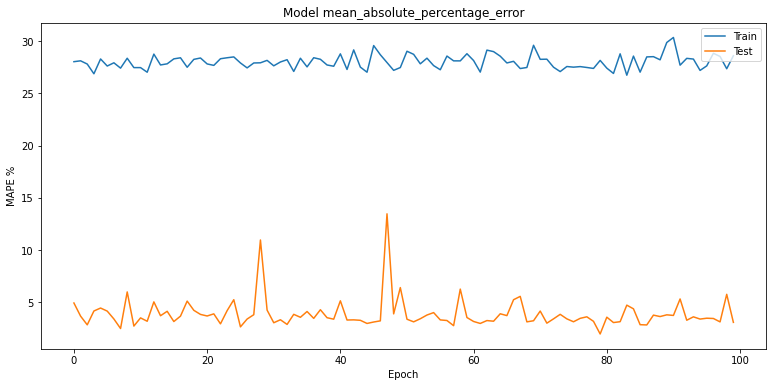

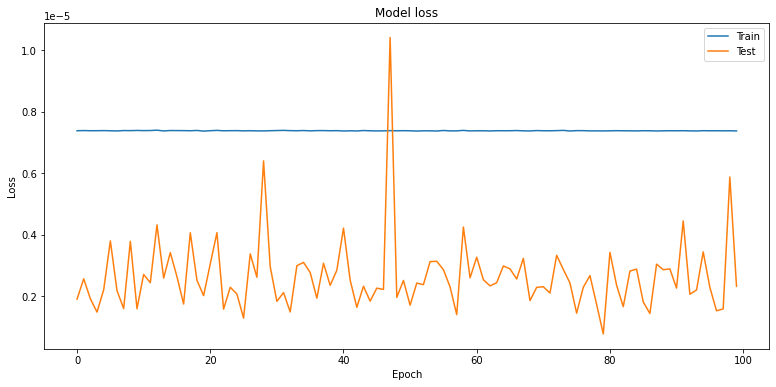

AttributeError: 'History' object has no attribute 'evaluate'

In [162]:
import matplotlib.pyplot as plt

history = model.fit(X_train, y_train,
                    batch_size=32,
                    epochs=100,
                    validation_data=(x_val,y_val),
                    verbose=0,
                   use_multiprocessing=True)

# Plot training & validation accuracy values
plt.figure(figsize=(13,6))
plt.plot(history.history['mean_absolute_percentage_error'])
plt.plot(history.history['val_mean_absolute_percentage_error'])
plt.title('Model mean_absolute_percentage_error')
plt.ylabel('MAPE %')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper right')
plt.show()

# Plot training & validation loss values
plt.figure(figsize=(13,6))
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper right')
plt.show()



results_h = history.evaluate(X_test, y_test)

for i in range(len(model.metrics_names)):
  print(model.metrics_names[i],": ", results_h[i])

In [163]:
results_h = model.evaluate(X_test, y_test)

for i in range(len(model.metrics_names)):
  print(model.metrics_names[i],": ", results_h[i])

11677/11677 [==============================] - 8s 704us/step - loss: 1.1025e-05 - mean_absolute_percentage_error: 5.6005
loss :  1.1024930245184805e-05
mean_absolute_percentage_error :  5.600499153137207


# 75 epocs

In [182]:
model.fit(X_train,
          y_train,
          batch_size=32,
          epochs=75,
          validation_data=(x_val,y_val),
          use_multiprocessing=True)

Epoch 1/75
27246/27246 [==============================] - 30s 1ms/step - loss: 7.3839e-06 - mean_absolute_percentage_error: 27.4506 - val_loss: 2.8639e-06 - val_mean_absolute_percentage_error: 3.7509
Epoch 2/75
27246/27246 [==============================] - 30s 1ms/step - loss: 7.3856e-06 - mean_absolute_percentage_error: 28.6464 - val_loss: 3.2773e-06 - val_mean_absolute_percentage_error: 3.8884
Epoch 3/75
27246/27246 [==============================] - 30s 1ms/step - loss: 7.3895e-06 - mean_absolute_percentage_error: 28.9731 - val_loss: 2.3171e-06 - val_mean_absolute_percentage_error: 3.3842
Epoch 4/75
27246/27246 [==============================] - 30s 1ms/step - loss: 7.3800e-06 - mean_absolute_percentage_error: 27.7341 - val_loss: 1.5475e-06 - val_mean_absolute_percentage_error: 2.5498
Epoch 5/75
27246/27246 [==============================] - 30s 1ms/step - loss: 7.3849e-06 - mean_absolute_percentage_error: 27.8609 - val_loss: 2.4002e-06 - val_mean_absolute_percentage_error: 3.2108


Epoch 42/75
27246/27246 [==============================] - 30s 1ms/step - loss: 7.3786e-06 - mean_absolute_percentage_error: 27.8436 - val_loss: 2.5237e-06 - val_mean_absolute_percentage_error: 3.7485
Epoch 43/75
27246/27246 [==============================] - 29s 1ms/step - loss: 7.3775e-06 - mean_absolute_percentage_error: 28.3583 - val_loss: 2.6759e-06 - val_mean_absolute_percentage_error: 3.7928
Epoch 44/75
27246/27246 [==============================] - 29s 1ms/step - loss: 7.3833e-06 - mean_absolute_percentage_error: 27.9824 - val_loss: 2.6555e-06 - val_mean_absolute_percentage_error: 3.3521
Epoch 45/75
27246/27246 [==============================] - 30s 1ms/step - loss: 7.3755e-06 - mean_absolute_percentage_error: 27.9502 - val_loss: 3.1980e-06 - val_mean_absolute_percentage_error: 4.5968
Epoch 46/75
27246/27246 [==============================] - 30s 1ms/step - loss: 7.3812e-06 - mean_absolute_percentage_error: 27.5876 - val_loss: 1.1690e-06 - val_mean_absolute_percentage_error: 2.

In [184]:
results_3 = model.evaluate(X_test, y_test)

for i in range(len(model.metrics_names)):
  print(model.metrics_names[i],": ", results_3[i])

11677/11677 [==============================] - 8s 706us/step - loss: 1.1028e-05 - mean_absolute_percentage_error: 5.6927
loss :  1.1028234439436346e-05
mean_absolute_percentage_error :  5.692673206329346


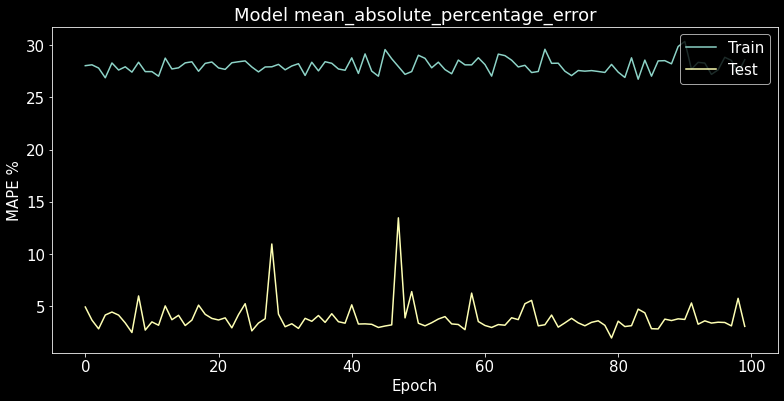

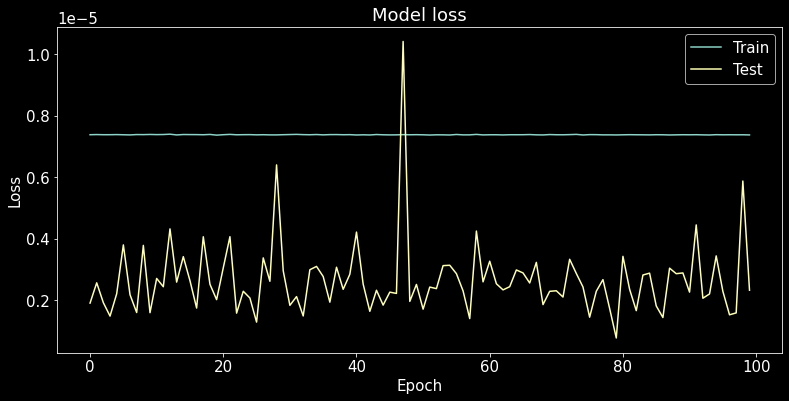

In [191]:
# Plot training & validation accuracy values
plt.figure(figsize=(13,6))
plt.rcParams.update({'font.size': 15})
#sns.set_style('darkgrid')
#plt.style.use("dark_background")
plt.plot(history.history['mean_absolute_percentage_error'])
plt.plot(history.history['val_mean_absolute_percentage_error'])
plt.title('Model mean_absolute_percentage_error')
plt.ylabel('MAPE %')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper right')
plt.show()

# Plot training & validation loss values
plt.figure(figsize=(13,6))
plt.rcParams.update({'font.size': 15})
#sns.set_style('darkgrid')
#plt.style.use("dark_background")
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper right')
plt.show()

# Mini batch

In [194]:
model.fit(X_train,
          y_train,
          batch_size=10,
          epochs=50,
          validation_data=(x_val,y_val),
          use_multiprocessing=True)

Epoch 1/50
87187/87187 [==============================] - 94s 1ms/step - loss: 7.5725e-06 - mean_absolute_percentage_error: 27.7612 - val_loss: 2.0047e-06 - val_mean_absolute_percentage_error: 3.2880
Epoch 2/50
87187/87187 [==============================] - 94s 1ms/step - loss: 7.5645e-06 - mean_absolute_percentage_error: 27.0652 - val_loss: 1.2807e-06 - val_mean_absolute_percentage_error: 2.3945
Epoch 3/50
87187/87187 [==============================] - 94s 1ms/step - loss: 7.5623e-06 - mean_absolute_percentage_error: 27.4725 - val_loss: 1.8159e-06 - val_mean_absolute_percentage_error: 3.9283
Epoch 4/50
87187/87187 [==============================] - 94s 1ms/step - loss: 7.5736e-06 - mean_absolute_percentage_error: 28.7220 - val_loss: 3.9975e-06 - val_mean_absolute_percentage_error: 5.0049
Epoch 5/50
87187/87187 [==============================] - 94s 1ms/step - loss: 7.5600e-06 - mean_absolute_percentage_error: 30.9393 - val_loss: 5.1033e-06 - val_mean_absolute_percentage_error: 9.7240


Epoch 42/50
87187/87187 [==============================] - 94s 1ms/step - loss: 7.5662e-06 - mean_absolute_percentage_error: 28.8447 - val_loss: 1.2800e-06 - val_mean_absolute_percentage_error: 2.7396
Epoch 43/50
87187/87187 [==============================] - 93s 1ms/step - loss: 7.5695e-06 - mean_absolute_percentage_error: 27.7414 - val_loss: 2.3405e-06 - val_mean_absolute_percentage_error: 5.3122
Epoch 44/50
87187/87187 [==============================] - 94s 1ms/step - loss: 7.5731e-06 - mean_absolute_percentage_error: 27.9531 - val_loss: 5.2488e-06 - val_mean_absolute_percentage_error: 6.3375
Epoch 45/50
87187/87187 [==============================] - 94s 1ms/step - loss: 7.5678e-06 - mean_absolute_percentage_error: 33.1904 - val_loss: 2.0621e-06 - val_mean_absolute_percentage_error: 3.8578
Epoch 46/50
87187/87187 [==============================] - 94s 1ms/step - loss: 7.5596e-06 - mean_absolute_percentage_error: 27.7894 - val_loss: 1.0568e-06 - val_mean_absolute_percentage_error: 1.

In [195]:
results_4 = model.evaluate(X_test, y_test)

for i in range(len(model.metrics_names)):
  print(model.metrics_names[i],": ", results_4[i])

11677/11677 [==============================] - 8s 706us/step - loss: 1.1151e-05 - mean_absolute_percentage_error: 6.5124
loss :  1.1150593309139367e-05
mean_absolute_percentage_error :  6.512428283691406


# Transfer learning

In [ ]:
# Presumably you would want to first load pre-trained weights.
model.load_weights(...)

# Freeze all layers except the last one.
for layer in model.layers[:-1]:
  layer.trainable = False

# Recompile and train (this will only update the weights of the last layer).
model.compile(...)
model.fit(...)

# Submission

In [196]:
y_hat = model.predict(x_val)
y_hat

array([[0.0180195 ],
       [0.01728316],
       [0.01803016],
       ...,
       [0.01860779],
       [0.0184859 ],
       [0.01785743]], dtype=float32)

In [197]:
sub_normalized = pd.DataFrame(x_val)
sub_normalized[16] = y_hat
sub_normalized

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16
0,0.4,0.000723,0.016087,0.555556,0.0,0.0,1.000000,1.0,1.00,0.474359,0.142857,0.0,0.0,0.0,0.0,0.0,0.018020
1,0.2,0.000347,0.005197,0.555556,0.0,0.0,0.000000,1.0,0.00,0.692308,0.071429,0.0,0.0,0.0,0.0,0.0,0.017283
2,0.4,0.000802,0.013274,0.555556,0.0,0.0,1.000000,1.0,1.00,0.551282,0.142857,0.0,0.0,0.0,0.0,0.0,0.018030
3,0.2,0.000556,0.000000,0.555556,0.0,0.0,0.142857,1.0,0.50,0.576923,0.071429,0.0,0.0,0.0,0.0,0.0,0.017339
4,0.6,0.001357,0.000000,0.555556,0.0,0.0,1.000000,0.0,0.50,0.974359,0.071429,0.0,0.0,0.0,0.0,0.0,0.018182
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
281661,0.4,0.000580,0.005085,0.555556,0.0,0.0,1.000000,0.0,0.00,0.551282,0.071429,1.0,0.0,0.0,0.0,0.0,0.017660
281662,0.6,0.004030,0.033339,0.555556,0.0,0.0,0.571429,1.0,0.50,0.589744,0.142857,1.0,0.0,0.0,1.0,0.0,0.019347
281663,0.6,0.002441,0.000000,0.777778,0.0,0.0,0.285714,1.0,0.50,0.576923,0.071429,1.0,0.0,0.0,0.0,0.0,0.018608
281664,0.4,0.002168,0.026563,0.555556,0.0,0.0,0.857143,0.0,1.00,0.807692,0.071429,1.0,0.0,0.0,0.0,0.0,0.018486


In [198]:
sub_desnorm = Estandar.inverse_transform(sub_normalized)
sub_desnorm = pd.DataFrame(sub_desnorm).iloc[:,-1]
sub_desnorm

0         1.226848e+06
1         7.966837e+05
2         1.233074e+06
3         8.293508e+05
4         1.321494e+06
              ...     
281661    1.016778e+06
281662    2.002071e+06
281663    1.570519e+06
281664    1.499311e+06
281665    1.132166e+06
Name: 16, Length: 281666, dtype: float64

In [199]:
sub = pd.DataFrame()
sub['gasto_familiar'] = sub_desnorm
sub['id_registro'] = id_cli.iloc[-281666:,]
sub['gasto_familiar_'] = sub['gasto_familiar']
sub = sub.drop(columns=['gasto_familiar'], axis=0)
sub.columns = ['id_registro','gasto_familiar']
sub

,id_registro,gasto_familiar
0,4055#201902,1.226848e+06
1,12598#201902,7.966837e+05
2,23697#201902,1.233074e+06
3,23768#201902,8.293508e+05
4,7174#201902,1.321494e+06
...,...,...
281661,8596193#202011,1.016778e+06
281662,8616083#202011,2.002071e+06
281663,8670207#202011,1.570519e+06
281664,8677655#202011,1.499311e+06


In [200]:
n = n+1
sub_name = "/mnt/workstation/data/Alomarrano/Sub/SubNN{}.csv".format(n)
sub_name

'/mnt/workstation/data/Alomarrano/Sub/SubNN4.csv'

In [201]:
sub.to_csv(sub_name, index=False)

# Data 4 submission **Happy Coding!**

In [156]:
data_submission = pd.read_csv("/mnt/workstation/data/Alomarrano/littlepig_full_ok.csv")
data_submission.shape

(9527193, 64)

In [157]:
data_submission = data_submission.iloc[-281666:,]
data_submission.shape

(281666, 64)

In [158]:
data_submission.to_csv("/mnt/workstation/data/Alomarrano/4submission_full_ok.csv", index=False)

In [178]:
data_submission.columns

Index(['periodo', 'fecha_nacimiento', 'edad', 'ult_actual', 'categoria',
       'codigo_ciiu', 'ind_mora_vigente', 'cartera_castigada', 'mora_max',
       'cant_moras_30_ult_12_meses', 'cant_moras_60_ult_12_meses',
       'cant_moras_90_ult_12_meses', 'cupo_total_tc', 'tenencia_tc',
       'cuota_tc_bancolombia', 'tiene_consumo', 'tiene_crediagil',
       'nro_tot_cuentas', 'ctas_activas', 'tiene_ctas_activas',
       'ctas_embargadas', 'tiene_ctas_embargadas', 'pension_fopep',
       'tiene_cred_hipo_1', 'tiene_cred_hipo_2', 'mediana_nom3',
       'mediana_pen3', 'ingreso_nompen', 'ingreso_final',
       'cant_mora_30_tdc_ult_3m_sf', 'cant_mora_30_consum_ult_3m_sf',
       'cuota_de_vivienda', 'cuota_de_consumo', 'cuota_rotativos',
       'cuota_tarjeta_de_credito', 'cuota_de_sector_solidario',
       'cuota_sector_real_comercio', 'cupo_tc_mdo', 'saldo_prom3_tdc_mdo',
       'cuota_tc_mdo', 'saldo_no_rot_mdo', 'cuota_libranza_sf',
       'cant_oblig_tot_sf', 'cant_cast_ult_12m_sr', 'i

# Data 4 ramdom Forest

In [175]:
df_4fr = df_onehot
df_4fr['id_registro'] = id_cli.iloc[-281666:,]
df_4fr

,categoria,ingreso_final,mediana_nom3,ocupacion_tag_gasto_familiar,cartera_castigada,ind_mora_vigente,rep_calif_cred_tag_gasto_familiar,genero_tag,estado_civil_tag_gasto_familiar,profesion_tag_gasto_familiar,ctas_activas,periodo,profesion_AUXILIAR DE ODONTOLOGIA,profesion_BACTERIOLOGIA,profesion_CARRERA MILITAR,profesion_COMERCIO INTERNACIONAL,gasto_familiar,id_registro
8000000,1.0,2406953.0,779157.0,6,1,1,2,1,1.0,44,2,201902,0,0,0,0,3.663700e+05,NaN
8000001,1.0,3014036.0,0.0,6,1,1,3,1,1.0,44,2,202001,0,0,0,0,7.372630e+05,NaN
8000002,2.0,1242174.0,0.0,6,1,1,3,1,1.0,44,2,202009,0,0,0,0,4.473640e+05,NaN
8000003,1.0,2851369.0,741967.0,6,1,1,4,1,1.0,44,2,201908,0,0,0,0,4.797520e+05,NaN
8000004,1.0,3171369.0,0.0,6,1,1,3,1,1.0,44,2,201911,0,0,0,0,1.599610e+05,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9527188,2.0,3876343.0,2281362.0,6,1,1,8,1,1.0,44,1,202011,0,0,0,0,7.431714e+05,8596193#202011
9527189,3.0,26913722.0,14956096.0,6,1,1,5,2,3.0,47,2,202011,0,0,1,0,8.502165e+05,8616083#202011
9527190,3.0,16301000.0,0.0,8,1,1,3,2,3.0,46,1,202011,0,0,0,0,7.853290e+05,8670207#202011
9527191,2.0,14481371.0,11916465.0,6,1,1,7,1,5.0,64,1,202011,0,0,0,0,1.029045e+06,8677655#202011


In [176]:
df_4fr.to_csv("/mnt/workstation/data/Alomarrano/4rf_full_ok_encoded_bestVar.csv", index=False)

In [177]:
data_submission

,periodo,fecha_nacimiento,edad,ult_actual,categoria,codigo_ciiu,ind_mora_vigente,cartera_castigada,mora_max,cant_moras_30_ult_12_meses,...,estado_civil,nivel_academico,profesion,ocupacion,ciudad_residencia,rep_calif_cred,genero,id_registro,anho,mes
9245527,201902,19721103,46,20180807,2.0,10,1,1,0,0,...,CASADO,UNIVERSITARIO,DISEÑO Y PUBLICIDAD,Empleado,GUASCA,A,M,4055#201902,2019,2
9245528,201902,19750930,43,20180130,1.0,10,1,1,1,0,...,SOLTERO,UNIVERSITARIO,ADMINISTRACION,Empleado,PEDRAZA,H,M,12598#201902,2019,2
9245529,201902,19740130,45,20190110,2.0,10,1,1,1,0,...,CASADO,UNIVERSITARIO,OTROS,Empleado,PEDRAZA,A,M,23697#201902,2019,2
9245530,201902,19610620,58,20180208,1.0,10,1,1,0,0,...,DIVORCIADO,BACHILLER,QUIMICA FARMACEUTICA,Empleado,PEDRAZA,G,M,23768#201902,2019,2
9245531,201902,19661010,52,20180825,3.0,10,1,1,0,0,...,DIVORCIADO,UNIVERSITARIO,MEDICINA,Empleado,PEDRAZA,A,F,7174#201902,2019,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9527188,202011,19740415,47,20201010,2.0,10,1,1,0,0,...,SOLTERO,UNIVERSITARIO,OTROS,Empleado,PUERRES,A,F,8596193#202011,2020,11
9527189,202011,19850620,35,20201003,3.0,90,1,1,28,0,...,DIVORCIADO,UNIVERSITARIO,CARRERA MILITAR,Empleado,PEDRAZA,C,M,8616083#202011,2020,11
9527190,202011,19740316,47,20200616,3.0,10,1,1,23,0,...,DIVORCIADO,UNIVERSITARIO,QUIMICA FARMACEUTICA,Independiente,MURILLO,D,M,8670207#202011,2020,11
9527191,202011,19780722,42,20200423,2.0,10,1,1,0,0,...,CASADO,ESPECIALIZACION,ECONOMIA,Empleado,PUERRES,B,F,8677655#202011,2020,11
